In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [31]:
data = pd.read_csv("..\Data\clean_data_for_model.csv")

In [32]:
data.head()

,company_Accenture,company_Adobe,company_Amazon,company_Apple,company_Atlassian,company_Bloomberg,company_ByteDance,company_Capital One,company_Cisco,company_Dell Technologies,...,region_South America,region_South-Eastern Asia,region_Southern Europe,region_UK&IRE,region_USA,region_Western Europe,totalyearlycompensation,yearsofexperience,yearsatcompany,education
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,150000,5.0,2.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,242000,20.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,121000,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,160000,4.0,2.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,150000,10.0,4.0,1.0


In [33]:
#X, y split:

In [34]:
y = data["totalyearlycompensation"]
X = data.drop(["totalyearlycompensation"],axis =1)

In [35]:
# Train test split:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [37]:
print(X_train.shape)
print(X_test.shape)

(16348, 91)
(7007, 91)


In [38]:
# Separating original numerical columns to apply transformation and scaling on them, and encoded columns until further merge:

In [39]:
X_train_num = X_train[["yearsofexperience", "yearsatcompany", "education"]]
X_test_num = X_test[["yearsofexperience", "yearsatcompany", "education"]]

In [40]:
columns_to_drop = ["yearsofexperience", "yearsatcompany", "education"]
X_train_enc = X_train.drop(columns=columns_to_drop)
X_test_enc = X_test.drop(columns=columns_to_drop)

In [41]:
# Transforming data with PowerTransformer in order to make distribution more normal.
# As a result we will see that all means are almost 0, and all std.deviations are around 1

In [42]:
pt = PowerTransformer()
pt.fit(X_train_num) # only to the numericals, not the encoded

filename = "../Transformers/PowerTransformer_stem.pickle"

with open(filename, "wb") as file:
        pickle.dump(pt,file)
        
X_train_transformed_np = pt.transform(X_train_num)
X_train_transformed_df =pd.DataFrame(pt.transform(X_train_num), columns=X_train_num.columns)

X_test_transformed_np = pt.transform(X_test_num)
X_test_transformed_df =pd.DataFrame(pt.transform(X_test_num), columns=X_test_num.columns)

In [43]:
X_train_transformed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearsofexperience,16348.0,1.260444e-17,1.000031,-2.018261,-0.663178,0.042522,0.694595,3.108107
yearsatcompany,16348.0,-2.260107e-17,1.000031,-1.335874,-1.335874,0.187082,0.816124,2.964501
education,16348.0,1.080070e-16,1.000031,-3.227088,-0.925364,0.717539,0.717539,2.675278


In [44]:
X_test_transformed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearsofexperience,7007.0,0.002668,1.003211,-2.018261,-0.663178,0.042522,0.694595,4.358662
yearsatcompany,7007.0,-0.000027,0.989415,-1.335874,-1.335874,0.187082,0.816124,3.413233
education,7007.0,-0.021020,0.998390,-3.227088,-0.925364,0.717539,0.717539,2.675278


In [45]:
X_train_transformed_df.head()

,yearsofexperience,yearsatcompany,education
0,-0.663178,-0.346743,0.717539
1,0.829401,-0.346743,0.717539
2,0.395370,1.484157,0.717539
3,-0.986981,0.187082,-0.925364
4,1.298042,1.029508,-0.925364


In [46]:
# Scaling data with MinMaxScaler in order to make the range of values in all variable the same.
# As a result we will see that all the min values are 0, and all teh max values are 1.

In [47]:
scaler = MinMaxScaler().fit(X_train_transformed_df)

filename = "../Scalers/MinMaxScaler_stem.pickle"

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_train_trans_scaled = scaler.transform(X_train_transformed_df) # only on the numericals transformed
X_train_trans_scaled_df = pd.DataFrame(X_train_trans_scaled, columns=X_train_transformed_df.columns)

X_test_trans_scaled = scaler.transform(X_test_transformed_df)
X_test_trans_scaled_df = pd.DataFrame(X_test_trans_scaled, columns=X_test_transformed_df.columns)

In [48]:
X_train_trans_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearsofexperience,16348.0,0.393702,0.195076,0.0,0.264336,0.401997,0.529196,1.0
yearsatcompany,16348.0,0.310641,0.232545,0.0,0.000000,0.354145,0.500421,1.0
education,16348.0,0.546745,0.169429,0.0,0.389966,0.668313,0.668313,1.0


In [49]:
X_test_trans_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearsofexperience,7007.0,0.394222,0.195696,0.0,0.264336,0.401997,0.529196,1.243946
yearsatcompany,7007.0,0.310635,0.230077,0.0,0.000000,0.354145,0.500421,1.104347
education,7007.0,0.543184,0.169151,0.0,0.389966,0.668313,0.668313,1.000000


In [50]:
# Now I am concatenating back transformed_scaled data to encoded columns.
# Before doing that I am resetting the indexes.

In [51]:
X_train_enc = X_train_enc.reset_index(drop=True)
X_train_trans_scaled_df = X_train_trans_scaled_df.reset_index(drop=True)

X_test_enc = X_test_enc.reset_index(drop=True)
X_test_trans_scaled_df = X_test_trans_scaled_df.reset_index(drop=True)

In [52]:
X_train_new = pd.concat([X_train_enc, X_train_trans_scaled_df], axis=1)
X_test_new = pd.concat([X_test_enc, X_test_trans_scaled_df], axis=1)

In [53]:
#KNN Regression

In [55]:
# The best model is the one with 9 neighbours, uniform weigh and Manhattan distance - r2 is 0.58

In [56]:
knn = KNeighborsRegressor(n_neighbors=9, weights='uniform', p=1)
knn.fit(X_train_new, y_train)

filename = "../Models/KNNRegressor_stem.pickle"

with open(filename, "wb") as file:
        pickle.dump(knn,file)

In [57]:
print("Train data R2 was: {:.2f}".format(knn.score(X_train_new, y_train)))
print("Test data R2 was: {:.2f}".format(knn.score(X_test_new, y_test)))

Train data R2 was: 0.61
Test data R2 was: 0.58


In [58]:
#%%writefile -a functions.py

def error_metrics_calculations(y_true, y_pred):

    """
    This function given a model predicted and real values calculates error metrics.
    Args:
       y_true: actual y values in a test set
       y_pred: predicted by model y values
    Returns:
       pandas.DataFrame: the dataframe with error metrics name and values
    """
        
    error_metrics = {"MAE": mean_absolute_error(y_true, y_pred), 'MSE': mean_squared_error(y_true, y_pred), 
                     'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)), 'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
                     'R2': r2_score(y_true, y_pred)}
    df = pd.DataFrame(list(error_metrics.items()), columns=['Error_metric', 'Value'])
    return df

In [59]:
y_pred = knn.predict(X_test_new)
error_metrics = error_metrics_calculations(y_test, y_pred)
error_metrics

,Error_metric,Value
0,MAE,5.486385e+04
1,MSE,7.824141e+09
2,RMSE,8.845417e+04
3,MAPE,3.288207e+01
4,R2,5.785994e-01


(0.0, 10000000.0)

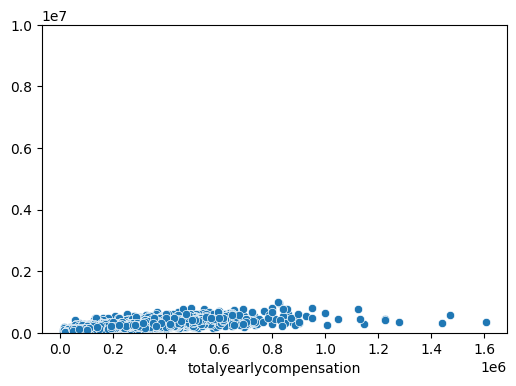

In [66]:
plt.figure(figsize=(6,4))
y = sns.scatterplot(x=y_test, y=y_pred)
plt.ylim(0, 10000000)

(0.0, 1600000.0)

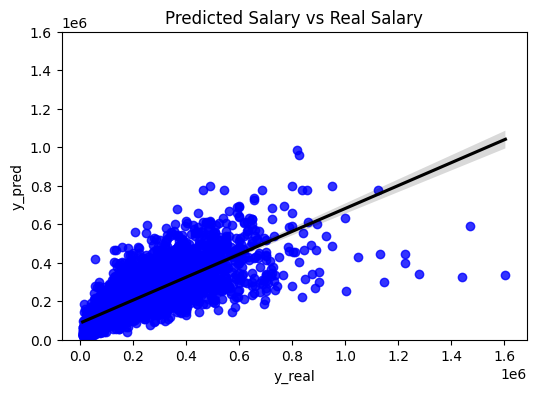

In [98]:
plt.figure(figsize=(6,4))
y = sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'black'})
y.set(ylabel='y_pred', xlabel='y_real', title = 'Predicted Salary vs Real Salary')
plt.ylim(0, 1600000)

In [99]:
y.figure.savefig('../Images/Scatterplot.png', bbox_inches = "tight")

(-400000.0, 500000.0)

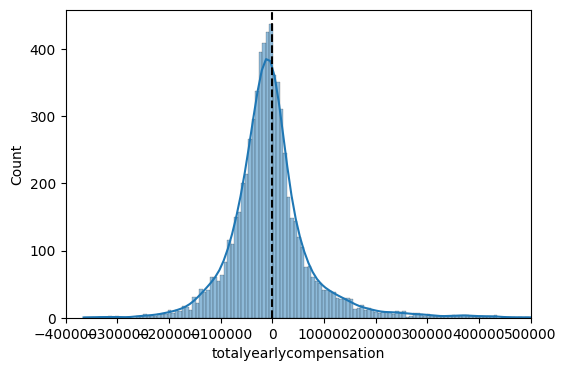

In [96]:
plt.figure(figsize=(6,4))
h = sns.histplot(x=(y_test-y_pred), kde=True)
plt.axvline(x=0, color='black', linestyle='--')
plt.xlim(-400000, 500000)

In [97]:
h.figure.savefig('../Images/Histogram.png', bbox_inches = "tight")